<a href="https://colab.research.google.com/github/Thilaak123/Industrial-Copper-Modeling/blob/main/industrial_copper_model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import json
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
pip install openpyxl

In [ ]:
df=pd.read_excel(r"/content/Copper_Set.xlsx")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [ ]:
data=df.copy(True)
data.T

,0,1,2,3,4,5,6,7,8,9,...,181663,181664,181665,181666,181667,181668,181669,181670,181671,181672
id,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,E140FF1B-2407-4C02-A0DD-780A093B1158,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,4E1C4E78-152B-430A-8094-ADD889C9D0AD,FE372230-29B1-4A29-BB73-CB9D3078C286,E1B47219-42C8-411D-AE46-AD5256DC4757,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,2851F48B-DA32-4DF3-884B-17A3100DD65A,6E4D638C-A820-4A40-836F-C9D48BC65528,...,08F8F1D6-0DAC-42B5-BA8A-B6C99EF1700B,A33557CD-93EF-4828-8235-E0A576C1A925,F9B79E56-2EBF-417B-9802-7F575D1079F7,C01DE4E8-BC5F-42AD-B35F-8FCBEE34C6ED,0B812591-B501-4F34-859A-B06381FAEB44,DE633116-D1DF-4846-982E-55EFC3658A76,A48374B1-E6DB-45F2-889A-1F9C27C099EB,91643238-5C7B-4237-9A5F-63AE3D35F320,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC
item_date,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,...,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0
quantity tons,54.151139,768.024839,386.127949,202.411065,785.526262,225.790676,3.522613,113.387124,69.071853,630.626917,...,1203.157826,603.11494,6.169226,82.123794,106.783299,102.482422,208.086469,4.235594,-2000,406.686538
customer,30156308.0,30202938.0,30153963.0,30349574.0,30211560.0,30202938.0,30209509.0,30342192.0,30341428.0,30202938.0,...,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0
country,28.0,25.0,30.0,32.0,28.0,25.0,30.0,32.0,38.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
status,Won,Won,Won,Won,Won,Won,Draft,Won,Won,Won,...,Won,Won,Won,Won,Won,Won,Won,Won,Won,Won
item type,W,W,WI,S,W,W,W,W,S,W,...,W,W,W,W,W,W,W,W,W,W
application,10.0,41.0,28.0,59.0,10.0,41.0,41.0,41.0,10.0,41.0,...,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0
thickness,2.0,0.8,0.38,2.3,4.0,1.5,0.38,0.68,0.6,1.5,...,0.72,0.85,0.71,1.18,0.96,0.96,0.95,0.71,0.85,0.71
width,1500.0,1210.0,952.0,1317.0,2000.0,1265.0,1125.0,1220.0,1275.0,1165.0,...,1240.0,1240.0,1300.0,1220.0,1240.0,1220.0,1500.0,1250.0,1250.0,1240.0


In [ ]:
data.shape

(181673, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [ ]:
data.isna().sum()

,0
id,2
item_date,1
quantity tons,0
customer,1
country,28
status,2
item type,0
application,24
thickness,1
width,0


In [ ]:
for i in list(data.columns):
    print(f"{i}  \t:_____________{data[i].nunique()}")

id  	:_____________181671
item_date  	:_____________252
quantity tons  	:_____________181673
customer  	:_____________1169
country  	:_____________17
status  	:_____________9
item type  	:_____________7
application  	:_____________30
thickness  	:_____________594
width  	:_____________1386
material_ref  	:_____________16563
product_ref  	:_____________33
delivery date  	:_____________28
selling_price  	:_____________9795


In [ ]:
data[data["id"].isna()==True]['id']

,id
26,NaN
104566,NaN


In [ ]:
data.iloc[26]

,26
id,NaN
item_date,20210401.0
quantity tons,15.92799
customer,30271717.0
country,28.0
status,To be approved
item type,W
application,10.0
thickness,0.8
width,1000.0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


# PRE-PROCESSING

# CONVERTING DATE TIME FORMAT

In [ ]:
columns_to_convert_datetime = ['item_date', 'delivery date']
for i in columns_to_convert_datetime:
    data[i] = pd.to_datetime(data[i], format='%Y%m%d', errors='coerce').dt.date
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


In [ ]:
data.dtypes

,0
id,object
item_date,object
quantity tons,object
customer,float64
country,float64
status,object
item type,object
application,float64
thickness,float64
width,float64


In [ ]:
data['item_date'] = pd.to_datetime(data['item_date'], format='%Y-%m-%d')
data['delivery date']=pd.to_datetime(data['delivery date'],format='%Y-%m-%d')
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


In [ ]:
print(data['item_date'].max())
print(data['item_date'].min())

2021-04-01 00:00:00
2020-07-02 00:00:00


In [ ]:
print(data["delivery date"].max())
print(data['delivery date'].min())

2022-01-01 00:00:00
2019-04-01 00:00:00


In [ ]:
data.dtypes

,0
id,object
item_date,datetime64[ns]
quantity tons,object
customer,float64
country,float64
status,object
item type,object
application,float64
thickness,float64
width,float64


# CONVERTING NUMERIC VALUES

In [ ]:
# columns_to_convert_numeric = ["quantity tons", "customer", "country", "application", "thickness", "width", "selling_price"]
# data[columns_to_convert_numeric] = data[columns_to_convert_numeric].apply(pd.to_numeric, errors="coerce")

In [ ]:
data.dtypes

,0
id,object
item_date,datetime64[ns]
quantity tons,object
customer,float64
country,float64
status,object
item type,object
application,float64
thickness,float64
width,float64


In [ ]:
columns_to_convert_numeric = ["quantity tons", "customer","country", "application", "thickness", "width", "selling_price"]
for i in columns_to_convert_numeric:
  data[i]=pd.to_numeric(data[i],errors='coerce')
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


In [ ]:
data.dtypes

,0
id,object
item_date,datetime64[ns]
quantity tons,float64
customer,float64
country,float64
status,object
item type,object
application,float64
thickness,float64
width,float64


In [ ]:
data.isna().sum()

,0
id,2
item_date,3
quantity tons,1
customer,1
country,28
status,2
item type,0
application,24
thickness,1
width,0


# DROP ID COLUMN

In [ ]:
data.drop(columns=['id'],inplace=True)
data.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


# MATERIAL_REF COLUMN

In [ ]:
data['material_ref'] = data['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
data.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


In [ ]:
data.drop(columns=['material_ref'],inplace=True)
data.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0


In [ ]:
data.isna().sum()

,0
item_date,3
quantity tons,1
customer,1
country,28
status,2
item type,0
application,24
thickness,1
width,0
product_ref,0


In [ ]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181670,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181672.0,5874.925754,-2000.0,10.970298,30.364635,67.160612,1000000000.0,2349081.241674
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.709926
delivery date,181670,2021-01-25 22:44:26.223372032,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181672.0,1918.035505,-1160.0,669.0,812.0,953.0,100001015.0,331795.642555


# CHANGE TH NEGATIVE VALUES IN THE COLUMNS

In [ ]:
# data['quantity tons'] = data['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
# data['selling_price'] = data['selling_price'].apply(lambda x: np.nan if x<=0 else x)
# data.describe().T

FILLNA VALUES

WITH MEAN

In [ ]:
# columns_fill_mean = ["quantity tons" , "thickness", "width", "selling_price"]
# column_means = data[columns_fill_mean].mean()
# data[columns_fill_mean] = data[columns_fill_mean].fillna(column_means)

WITH MEDIAN

In [ ]:
#numerical datatype using median
data['quantity tons'].fillna(data['quantity tons'].median(), inplace=True)
data['customer'].fillna(data['customer'].median(), inplace=True)
data['country'].fillna(data['country'].median(), inplace=True)
data['application'].fillna(data['application'].median(), inplace=True)
data['thickness'].fillna(data['thickness'].median(), inplace=True)
data['selling_price'].fillna(data['selling_price'].median(), inplace=True)

WITH MODE

In [ ]:
# columns_fill_mode = ['item_date', 'status', 'delivery date']
# columns_modes = data[columns_fill_mode].mode().iloc[0]
# data[columns_fill_mode] = data[columns_fill_mode].fillna(columns_modes)

In [ ]:
# object datatype using mode
data['item_date'].fillna(data['item_date'].mode().iloc[0], inplace=True)
data['status'].fillna(data['status'].mode().iloc[0], inplace=True)
data['delivery date'].fillna(data['delivery date'].mode().iloc[0], inplace=True)

In [ ]:
data["country"]=data["country"].astype('int64')

In [ ]:
data.isna().sum()

,0
item_date,0
quantity tons,0
customer,0
country,0
status,0
item type,0
application,0
thickness,0
width,0
product_ref,0


In [ ]:
data.dtypes

,0
item_date,datetime64[ns]
quantity tons,float64
customer,float64
country,int64
status,object
item type,object
application,float64
thickness,float64
width,float64
product_ref,int64


In [ ]:
data.to_csv('clean_copper_data.csv',index=False)

In [ ]:
# data=pd.read_csv("/content/clean_copper_data.csv")
# data.head(2)

# **EDA**

TO VISUALIZE OUTLIERS AND SKEWNESS

In [ ]:
# BEFORE TREATING

eda_data=data.copy(True)

In [ ]:
# columns_to_convert_datetime = ['item_date', 'delivery date']
# for i in columns_to_convert_datetime:
#     eda_data[i] = pd.to_datetime(data[i], format='%Y%m%d', errors='coerce').dt.date
# data.head(2)

In [ ]:
eda_data.dtypes

,0
item_date,datetime64[ns]
quantity tons,float64
customer,float64
country,int64
status,object
item type,object
application,float64
thickness,float64
width,float64
product_ref,int64


# Using Boxplot and Distplot

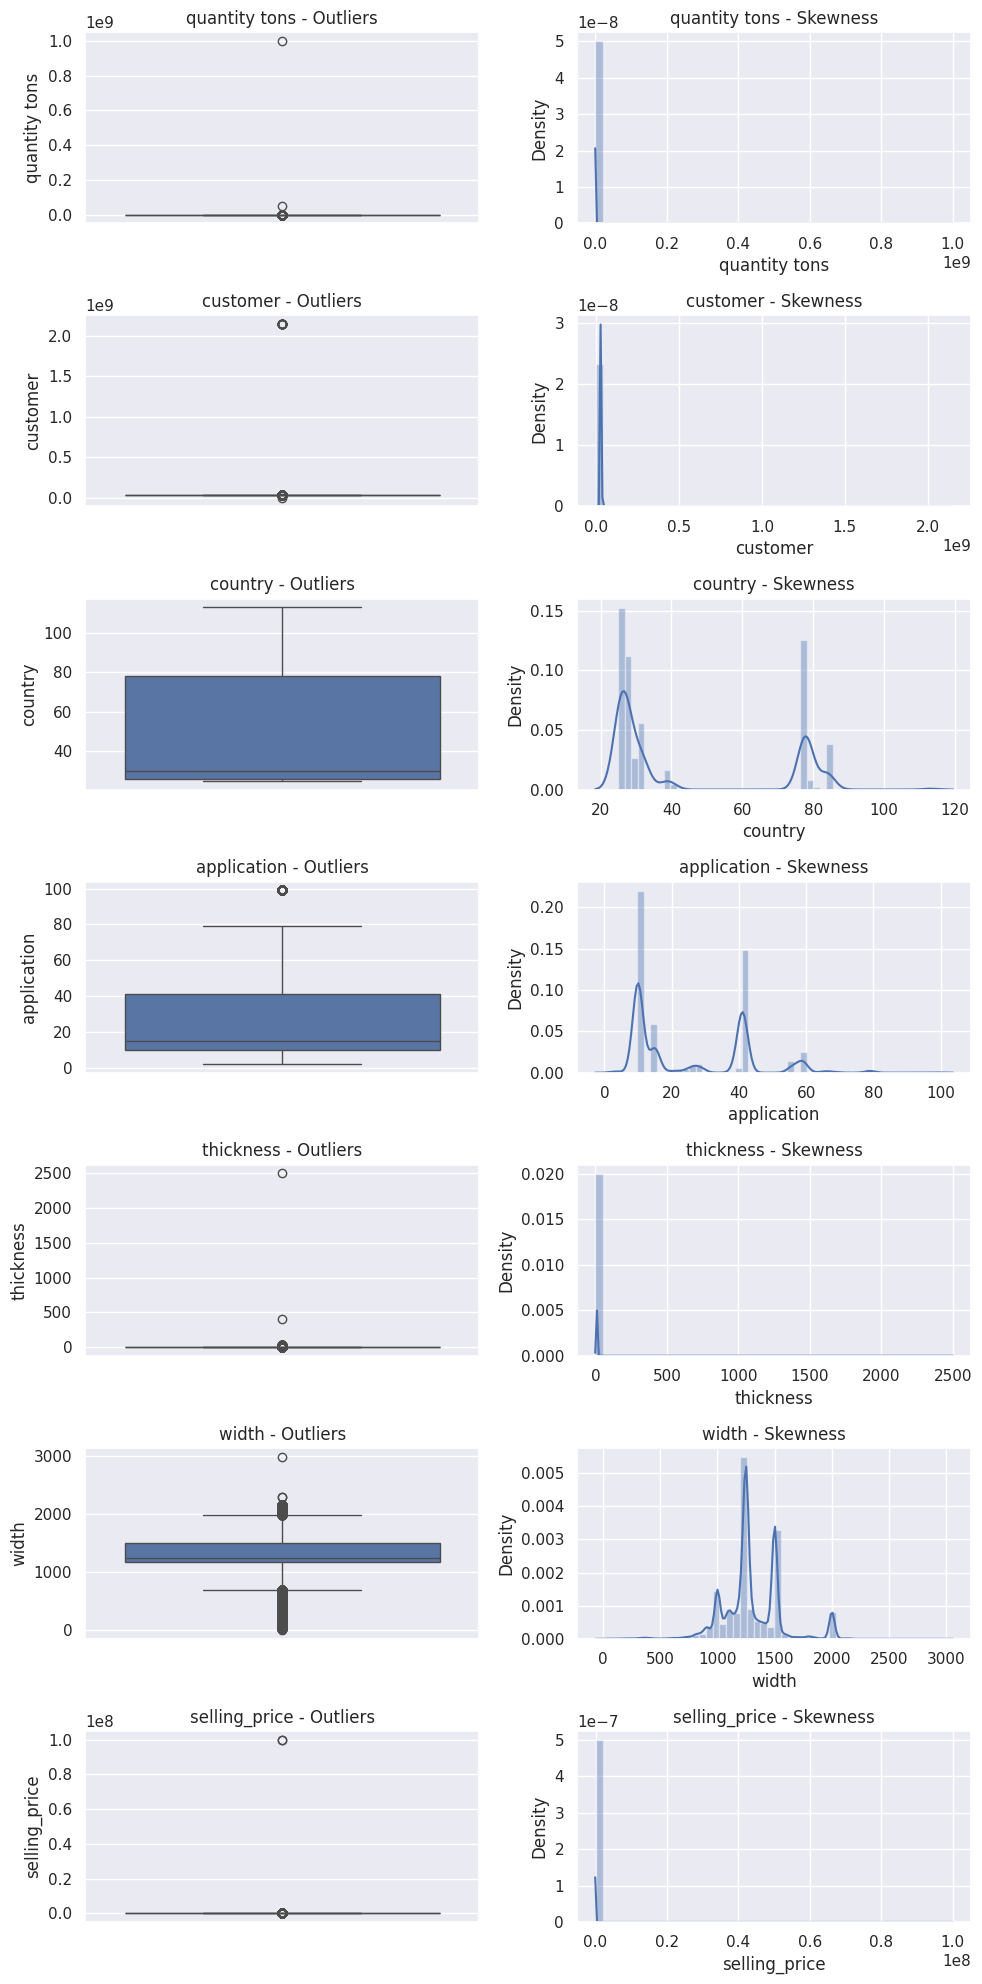

In [ ]:
# Create a figure with 6 subplots
fig, axes = plt.subplots(7, 2, figsize=(10,20))

sns.boxplot(ax=axes[0, 0], data=eda_data['quantity tons'])      #quantity tons
axes[0, 0].set_title('quantity tons - Outliers')
sns.distplot(ax=axes[0, 1], a=eda_data['quantity tons'])
axes[0, 1].set_title('quantity tons - Skewness')

sns.boxplot(ax=axes[1, 0], data=eda_data['customer'])          #customer
axes[1, 0].set_title('customer - Outliers')
sns.distplot(ax=axes[1, 1], a=eda_data['customer'])
axes[1, 1].set_title('customer - Skewness')

sns.boxplot(ax=axes[2, 0], data=eda_data['country'])           #country
axes[2, 0].set_title('country - Outliers')
sns.distplot(ax=axes[2, 1], a=eda_data['country'])
axes[2, 1].set_title('country - Skewness')

sns.boxplot(ax=axes[3, 0], data=eda_data['application'])       #application
axes[3, 0].set_title('application - Outliers')
sns.distplot(ax=axes[3, 1], a=eda_data['application'])
axes[3, 1].set_title('application - Skewness')

sns.boxplot(ax=axes[4, 0], data=eda_data['thickness'])        #thickness
axes[4, 0].set_title('thickness - Outliers')
sns.distplot(ax=axes[4, 1], a=eda_data['thickness'])
axes[4, 1].set_title('thickness - Skewness')

sns.boxplot(ax=axes[5, 0], data=eda_data['width'])            #width
axes[5, 0].set_title('width - Outliers')
sns.distplot(ax=axes[5, 1], a=eda_data['width'])
axes[5, 1].set_title('width - Skewness')

sns.boxplot(ax=axes[6, 0], data=eda_data['selling_price'])   #selling_price
axes[6, 0].set_title('selling_price - Outliers')
sns.distplot(ax=axes[6, 1], a=eda_data['selling_price'])
axes[6, 1].set_title('selling_price - Skewness')

plt.tight_layout()
plt.show()

# USING VIOLIN PLOT

In [ ]:
def plot(eda_data, column):
    plt.figure(figsize=(10,5))
    plt.subplot(1,1,1)
    sns.violinplot(data=eda_data, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

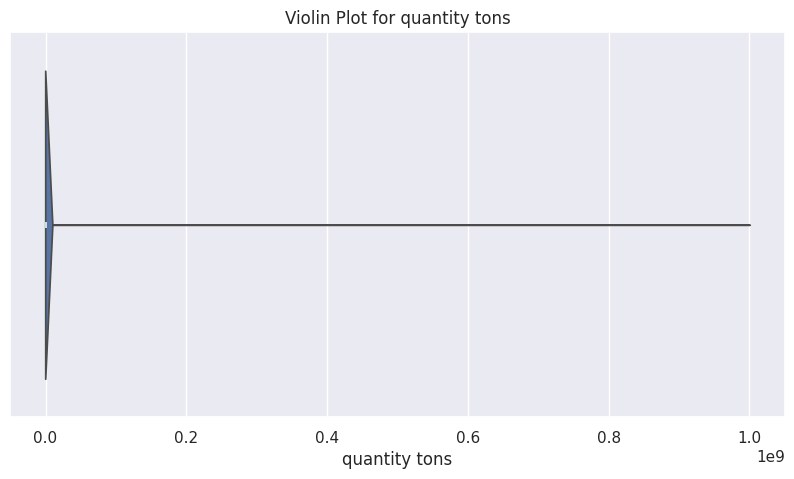

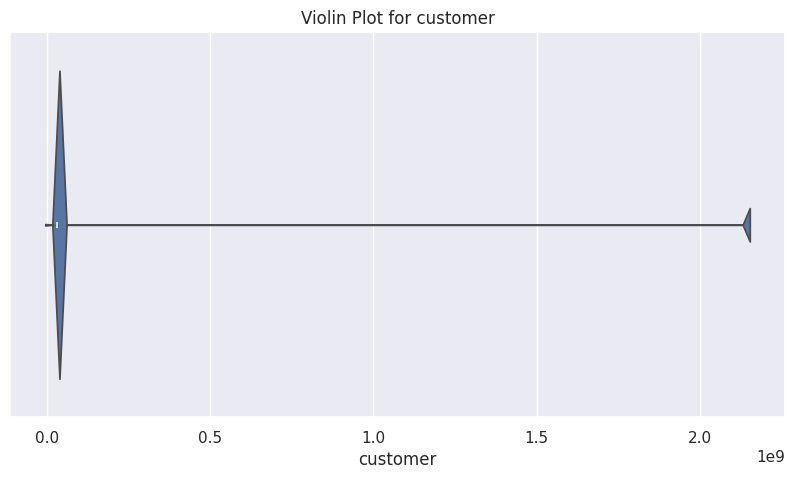

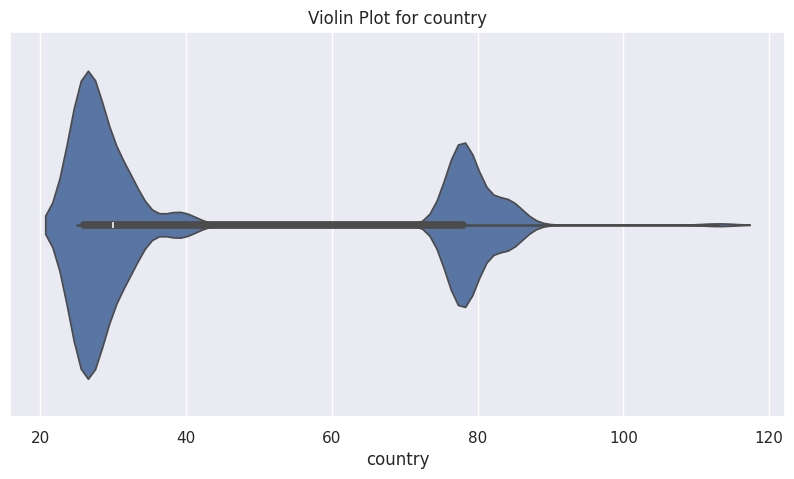

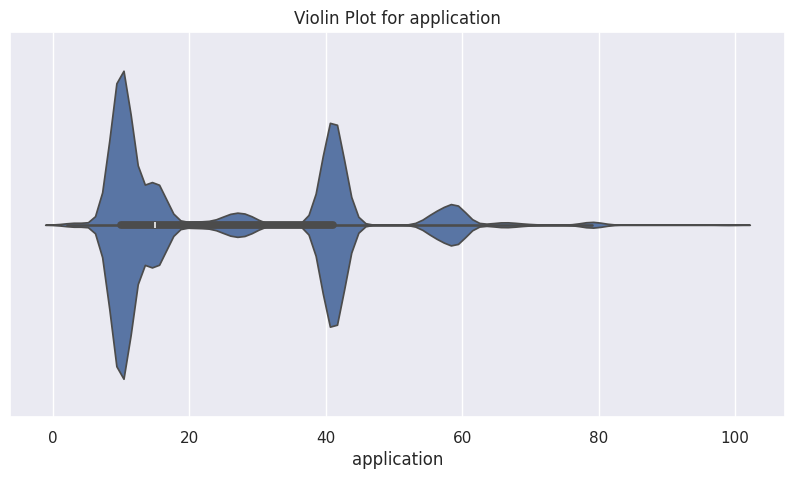

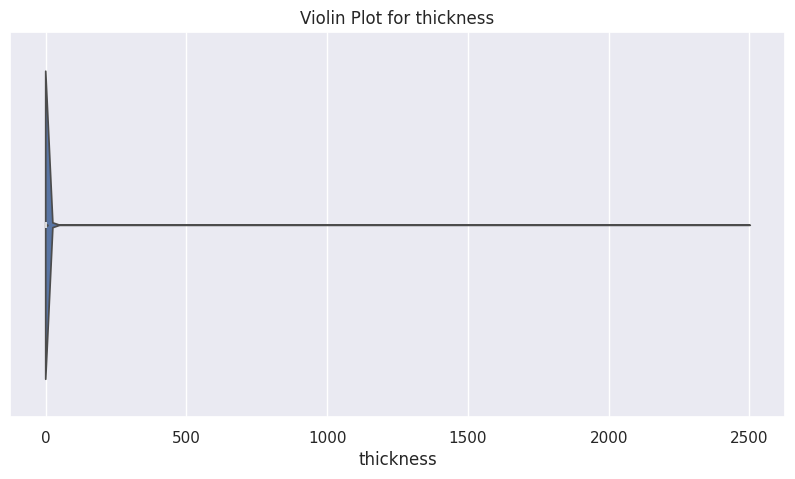

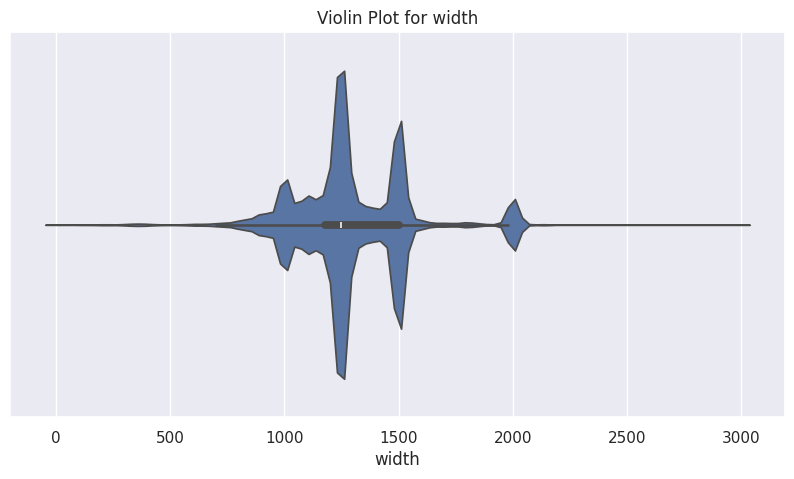

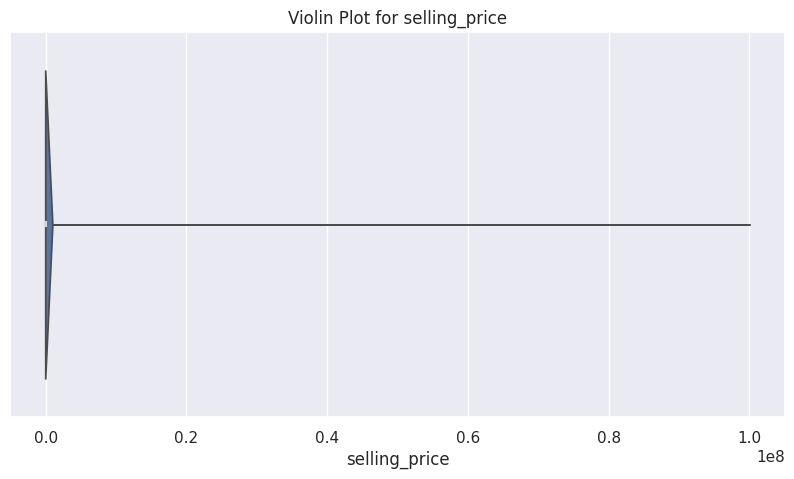

In [ ]:
for i in ['quantity tons', 'customer', 'country',  'application', 'thickness', 'width', 'selling_price']:
    plot(eda_data, i)

In [ ]:
out_skew_data=eda_data.copy(True)

In [ ]:
skewed_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
for column in skewed_columns:
    neg = (out_skew_data[column] <= 0)
    print(f'{column} : {neg.sum()} ')
    out_skew_data.loc[neg,column] = np.nan

quantity tons : 4 
thickness : 0 
width : 0 
selling_price : 7 


In [ ]:
out_skew_data.isna().sum()

,0
item_date,0
quantity tons,4
customer,0
country,0
status,0
item type,0
application,0
thickness,0
width,0
product_ref,0


In [ ]:
out_skew_data.dropna(inplace=True)

In [ ]:
out_skew_data.isna().sum()

,0
item_date,0
quantity tons,0
customer,0
country,0
status,0
item type,0
application,0
thickness,0
width,0
product_ref,0


In [ ]:
out_skew_data_1=out_skew_data.copy(True)

In [ ]:
out_skew_data_1=out_skew_data_1.drop(['item_date','delivery date','status','item type'],axis=1)
# out_skew_data_2=out_skew_data_1.copy(True)

In [ ]:
out_skew_data_1.skew()

,0
quantity tons,424.677959
customer,86.982674
country,0.753768
application,0.724624
thickness,15.291361
width,0.374564
product_ref,1.015276
selling_price,301.378964


In [ ]:
print(out_skew_data['item_date'].max())
print(out_skew_data['item_date'].min())
print(out_skew_data["delivery date"].max())
print(out_skew_data['delivery date'].min())

2021-04-01 00:00:00
2020-07-02 00:00:00
2022-01-01 00:00:00
2019-04-01 00:00:00


# IQR-Inter Quartile Range

In [ ]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
before_stats = out_skew_data[outlier_columns].describe()

# Iterate over outlier columns and remove outliers
for column in outlier_columns:
    Q1 = out_skew_data[column].quantile(0.25)
    Q3 = out_skew_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    out_skew_data[column] = out_skew_data[column].clip(lower_bound, upper_bound)

# Calculate summary statistics after removing outliers
after_stats = out_skew_data[outlier_columns].describe()

# Compare the statistics before and after outlier removal
print("Summary statistics before removing outliers:")
print(before_stats)
print("\nSummary statistics after removing outliers:")
print(after_stats)

Summary statistics before removing outliers:
       quantity tons      thickness          width  selling_price
count   1.816620e+05  181662.000000  181662.000000   1.816620e+05
mean    5.875259e+03       2.551128    1295.289042   1.918150e+03
std     2.349146e+06       2.977117     261.638547   3.318048e+05
min     1.000000e-05       0.180000       1.000000   1.000000e-01
25%     1.097088e+01       0.700000    1180.000000   6.690000e+02
50%     3.036500e+01       1.500000    1250.000000   8.120000e+02
75%     6.716107e+01       3.000000    1500.000000   9.530000e+02
max     1.000000e+09     400.000000    2990.000000   1.000010e+08

Summary statistics after removing outliers:
       quantity tons      thickness          width  selling_price
count  181662.000000  181662.000000  181662.000000  181662.000000
mean       49.176355       2.245440    1297.048008     819.080808
std        47.993499       1.890698     248.968268     209.127042
min         0.000010       0.180000     700.000000  

# AFTER TREATING OUTLIERS AND SKEWNESS

<function matplotlib.pyplot.show(close=None, block=None)>

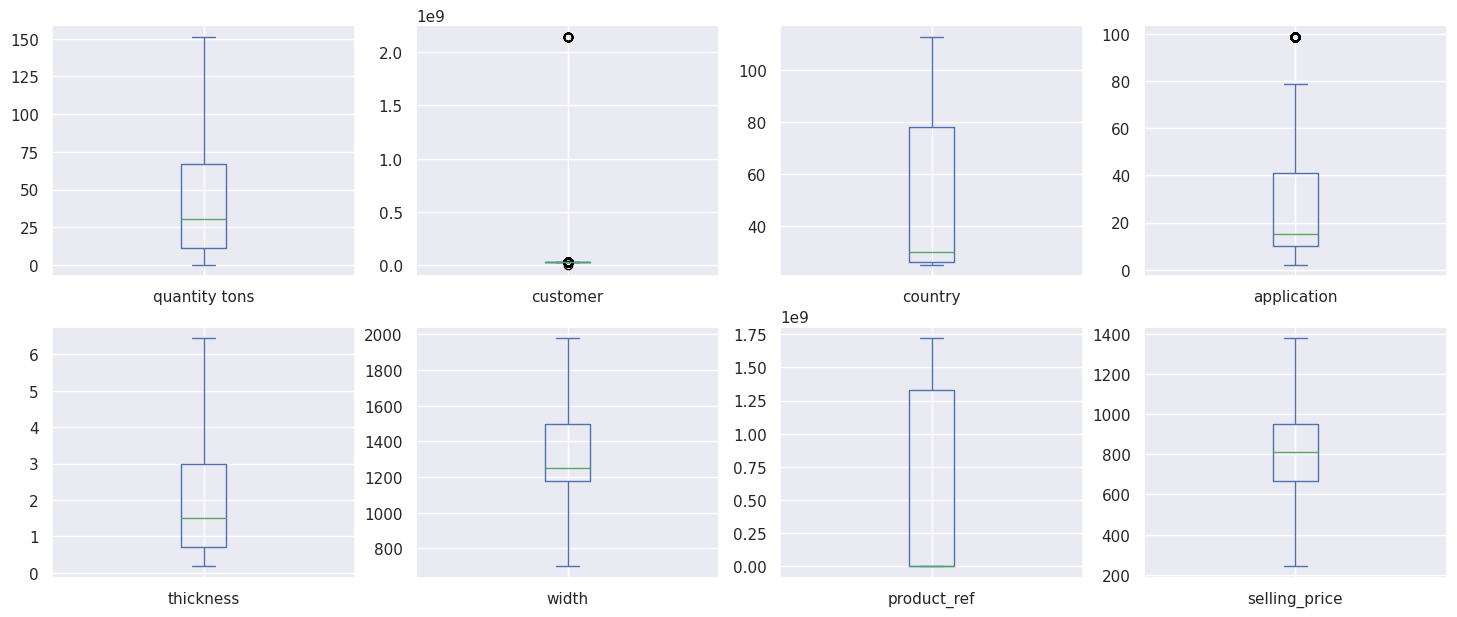

In [ ]:
out_skew_data.plot(kind='box',subplots=True,layout=(4,4),figsize=(18,15))
plt.show

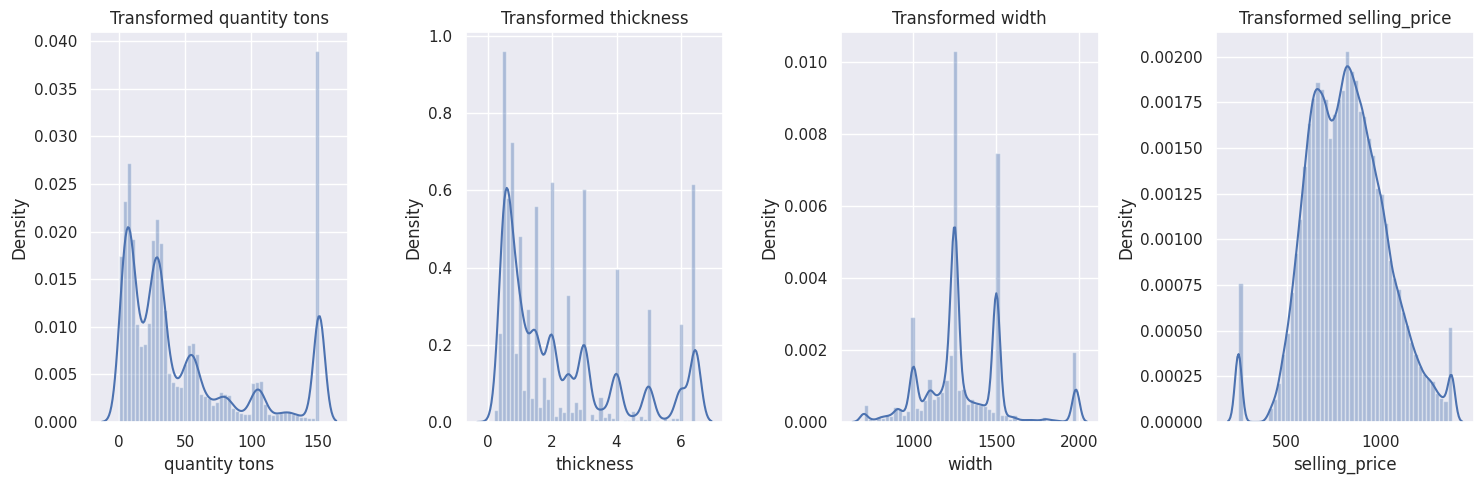

In [ ]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']

# Plot the histograms of the transformed data
fig, axes = plt.subplots(1, 4,figsize=(15, 5))
axes = axes.flatten()
for i, column in enumerate(outlier_columns):
    sns.distplot(out_skew_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Transformed {column}")

plt.tight_layout()
plt.show()

In [ ]:
out_skew_data_1.skew()

,0
quantity tons,424.677959
customer,86.982674
country,0.753768
application,0.724624
thickness,15.291361
width,0.374564
product_ref,1.015276
selling_price,301.378964


In [ ]:
# Here are some guidelines for interpreting skewness values:

# Skewness value close to 0: The distribution is approximately symmetrical.
# Skewness value between -0.5 and -1 or between 0.5 and 1: The distribution is moderately skewed.
# Skewness value less than -1 or greater than 1: The distribution is highly skewed.

# FEATURE ENGINEERING

*   Lable encoding
*   Feature selection

*  Standardize / normalize data



In [ ]:
model_data=out_skew_data.copy(True)
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181662 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181662 non-null  datetime64[ns]
 1   quantity tons  181662 non-null  float64       
 2   customer       181662 non-null  float64       
 3   country        181662 non-null  int64         
 4   status         181662 non-null  object        
 5   item type      181662 non-null  object        
 6   application    181662 non-null  float64       
 7   thickness      181662 non-null  float64       
 8   width          181662 non-null  float64       
 9   product_ref    181662 non-null  int64         
 10  delivery date  181662 non-null  datetime64[ns]
 11  selling_price  181662 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 18.0+ MB


In [ ]:
# model_data['item_date']=model_data['item_data'].astype('item_data')
# model_data['delivery_date']=model_data['delivery date'].astype('item_data')

In [ ]:
# model_data['delivery_time_taken']=model_data['delivery date'].sub(model_data['item_date'],axis=0)
# model_data.head()

In [ ]:
model_data['delivery_time_taken']=(model_data['item_date']-model_data['delivery date']).abs().dt.days
model_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,2021-04-01,151.446350,30202938.0,25,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,2021-04-01,151.446350,30153963.0,30,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,90
3,2021-04-01,151.446350,30349574.0,32,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,90
4,2021-04-01,151.446350,30211560.0,28,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00,31


In [ ]:
x=model_data[['application','thickness','width','selling_price','quantity tons','country','customer','product_ref','delivery_time_taken']]

In [ ]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181662 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   item_date            181662 non-null  datetime64[ns]
 1   quantity tons        181662 non-null  float64       
 2   customer             181662 non-null  float64       
 3   country              181662 non-null  int64         
 4   status               181662 non-null  object        
 5   item type            181662 non-null  object        
 6   application          181662 non-null  float64       
 7   thickness            181662 non-null  float64       
 8   width                181662 non-null  float64       
 9   product_ref          181662 non-null  int64         
 10  delivery date        181662 non-null  datetime64[ns]
 11  selling_price        181662 non-null  float64       
 12  delivery_time_taken  181662 non-null  int64         
dtypes: datetime64[ns](2

In [ ]:
num=model_data.select_dtypes(include=np.number)
num

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28,10.0,2.00,1500.0,1670798778,854.00,91
1,151.446350,30202938.0,25,41.0,0.80,1210.0,1668701718,1047.00,0
2,151.446350,30153963.0,30,28.0,0.38,952.0,628377,644.33,90
3,151.446350,30349574.0,32,59.0,2.30,1317.0,1668701718,768.00,90
4,151.446350,30211560.0,28,10.0,4.00,1980.0,640665,577.00,31
...,...,...,...,...,...,...,...,...,...
181667,106.783299,30200854.0,25,41.0,0.96,1240.0,164141591,602.00,1
181668,102.482422,30200854.0,25,41.0,0.96,1220.0,164141591,591.00,1
181669,151.446350,30200854.0,25,41.0,0.95,1500.0,164141591,589.00,1
181670,4.235594,30200854.0,25,41.0,0.71,1250.0,164141591,619.00,1


# Correlation

In [ ]:
# correlation matrix (ranges from 1 to -1)
corrm=num.corr()
#corrm.to_csv('corrm.csv')
corrm

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,delivery_time_taken
quantity tons,1.000000,-0.001917,-0.090052,0.095509,0.002781,0.010415,0.051466,-0.041803,0.067691
customer,-0.001917,1.000000,-0.006669,-0.006869,0.021806,0.009585,-0.007716,-0.026032,-0.001515
country,-0.090052,-0.006669,1.000000,-0.019298,-0.055994,0.053864,-0.147310,-0.021736,-0.240433
application,0.095509,-0.006869,-0.019298,1.000000,-0.163479,-0.198875,-0.131813,0.129901,-0.167831
thickness,0.002781,0.021806,-0.055994,-0.163479,1.000000,0.419075,0.155755,-0.363865,0.084548
width,0.010415,0.009585,0.053864,-0.198875,0.419075,1.000000,-0.024106,-0.173317,0.038787
product_ref,0.051466,-0.007716,-0.147310,-0.131813,0.155755,-0.024106,1.000000,-0.077802,0.161775
selling_price,-0.041803,-0.026032,-0.021736,0.129901,-0.363865,-0.173317,-0.077802,1.000000,0.274241
delivery_time_taken,0.067691,-0.001515,-0.240433,-0.167831,0.084548,0.038787,0.161775,0.274241,1.000000


# Heatmap

<Axes: >

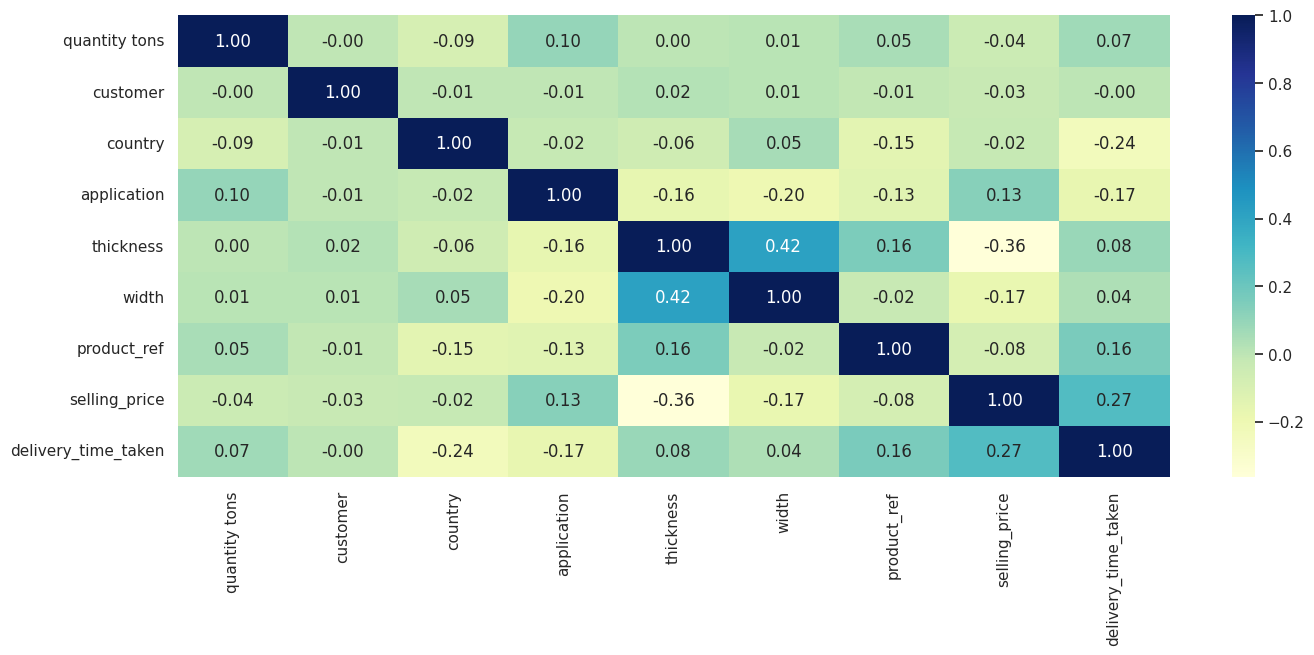

In [ ]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="YlGnBu",fmt=".2f")

# FINDING UNIQUE VALUE

In [ ]:
model_data['country'] = model_data['country'].astype(str)
country=model_data['country'].unique()
status=model_data['status'].unique()
item=model_data['item type'].unique()
print(country)
print(status)
print(item)

['28' '25' '30' '32' '38' '78' '27' '77' '113' '79' '26' '39' '40' '84'
 '80' '107' '89']
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']


# ENCODE THE CATEGORICAL COLUMN

country

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encode=OrdinalEncoder()
model_data["country"] = encode.fit_transform(model_data[["country"]])
transformed_country=model_data["country"].unique()

transformed_country

array([ 5.,  2.,  6.,  7.,  8., 12.,  4., 11.,  1., 13.,  3.,  9., 10.,
       15., 14.,  0., 16.])

status

In [ ]:
encode=OrdinalEncoder()
model_data['status'] = encode.fit_transform(model_data[['status']])
transformed_status=model_data['status'].unique()

transformed_status

array([7., 0., 6., 1., 2., 8., 5., 4., 3.])

item type

In [ ]:
encode=OrdinalEncoder()
model_data["item type"] = encode.fit_transform(model_data[["item type"]])
transformed_item=model_data["item type"].unique()

transformed_item

array([5., 6., 3., 1., 2., 0., 4.])

In [ ]:
model_data.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,5.0,7.0,5.0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,2021-04-01,151.446350,30202938.0,2.0,7.0,5.0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,2021-04-01,151.446350,30153963.0,6.0,7.0,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33,90


In [ ]:
co=model_data.corr()
co

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
item_date,1.000000,-0.004132,-0.003787,-0.017783,0.080490,0.077165,-0.008461,0.004422,0.005961,0.045224,0.920100,0.556554,0.438586
quantity tons,-0.004132,1.000000,-0.001917,-0.088883,-0.055881,-0.245006,0.095509,0.002781,0.010415,0.051466,0.016103,-0.041803,0.067691
customer,-0.003787,-0.001917,1.000000,-0.002373,-0.020450,-0.010901,-0.006869,0.021806,0.009585,-0.007716,-0.002908,-0.026032,-0.001515
country,-0.017783,-0.088883,-0.002373,1.000000,0.086437,0.152530,-0.045988,-0.043293,0.051924,-0.146436,-0.093026,-0.038036,-0.223484
status,0.080490,-0.055881,-0.020450,0.086437,1.000000,0.242816,0.132770,-0.127192,-0.092672,-0.069760,-0.054796,0.122194,-0.260778
item type,0.077165,-0.245006,-0.010901,0.152530,0.242816,1.000000,0.169087,-0.076804,-0.092086,-0.089531,0.005812,0.096072,-0.142563
application,-0.008461,0.095509,-0.006869,-0.045988,0.132770,0.169087,1.000000,-0.163479,-0.198875,-0.131813,-0.078519,0.129901,-0.167831
thickness,0.004422,0.002781,0.021806,-0.043293,-0.127192,-0.076804,-0.163479,1.000000,0.419075,0.155755,0.042483,-0.363865,0.084548
width,0.005961,0.010415,0.009585,0.051924,-0.092672,-0.092086,-0.198875,0.419075,1.000000,-0.024106,0.026825,-0.173317,0.038787
product_ref,0.045224,0.051466,-0.007716,-0.146436,-0.069760,-0.089531,-0.131813,0.155755,-0.024106,1.000000,0.096174,-0.077802,0.161775


# After encoding the Categorical data

In [ ]:
for i, j in zip(status, transformed_status):
    print('After encoding :',i,'----- encoded :',j)

After encoding : Won ----- encoded : 7.0
After encoding : Draft ----- encoded : 0.0
After encoding : To be approved ----- encoded : 6.0
After encoding : Lost ----- encoded : 1.0
After encoding : Not lost for AM ----- encoded : 2.0
After encoding : Wonderful ----- encoded : 8.0
After encoding : Revised ----- encoded : 5.0
After encoding : Offered ----- encoded : 4.0
After encoding : Offerable ----- encoded : 3.0


In [ ]:
for i,j in zip(item, transformed_item):
    print('After encoding :',i,'----- encoded :',j)

After encoding : W ----- encoded : 5.0
After encoding : WI ----- encoded : 6.0
After encoding : S ----- encoded : 3.0
After encoding : Others ----- encoded : 1.0
After encoding : PL ----- encoded : 2.0
After encoding : IPL ----- encoded : 0.0
After encoding : SLAWR ----- encoded : 4.0


In [ ]:
for i,j in zip(country, transformed_country):
    print('After encoding :',i,'----- encoded :',j)

After encoding : 28 ----- encoded : 5.0
After encoding : 25 ----- encoded : 2.0
After encoding : 30 ----- encoded : 6.0
After encoding : 32 ----- encoded : 7.0
After encoding : 38 ----- encoded : 8.0
After encoding : 78 ----- encoded : 12.0
After encoding : 27 ----- encoded : 4.0
After encoding : 77 ----- encoded : 11.0
After encoding : 113 ----- encoded : 1.0
After encoding : 79 ----- encoded : 13.0
After encoding : 26 ----- encoded : 3.0
After encoding : 39 ----- encoded : 9.0
After encoding : 40 ----- encoded : 10.0
After encoding : 84 ----- encoded : 15.0
After encoding : 80 ----- encoded : 14.0
After encoding : 107 ----- encoded : 0.0
After encoding : 89 ----- encoded : 16.0


# Pickle

In [ ]:
import pickle

file_path='country.pkl'
file_path2='status.pkl'
file_path3='item type.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(transformed_country, file)
with open(file_path2, 'wb') as file:
    pickle.dump(transformed_status, file)
with open(file_path3, 'wb') as file:
    pickle.dump(transformed_item, file)

print(f'Pickle file created: {file_path}, {file_path2},{file_path3}')

Pickle file created: country.pkl, status.pkl,item type.pkl


# Load

In [ ]:
import pickle
with open('status.pkl', 'rb') as file:
    encode_status = pickle.load(file)

encode_status

array([7., 0., 6., 1., 2., 8., 5., 4., 3.])

# REGRESSION MODEL FOR FINDING SELLING PRICE

In [ ]:
category_col=['status', 'item type','country']
encoder= OrdinalEncoder()
for i in category_col:
    print(i)
    model_data[i] = encoder.fit_transform(model_data[[i]])
    print(model_data[i].unique())

status
[7. 0. 6. 1. 2. 8. 5. 4. 3.]
item type
[5. 6. 3. 1. 2. 0. 4.]
country
[ 5.  2.  6.  7.  8. 12.  4. 11.  1. 13.  3.  9. 10. 15. 14.  0. 16.]


In [ ]:
model_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,5.0,7.0,5.0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,2021-04-01,151.446350,30202938.0,2.0,7.0,5.0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,2021-04-01,151.446350,30153963.0,6.0,7.0,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33,90
3,2021-04-01,151.446350,30349574.0,7.0,7.0,3.0,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,90
4,2021-04-01,151.446350,30211560.0,5.0,7.0,5.0,10.0,4.00,1980.0,640665,2021-03-01,577.00,31


In [ ]:
X = model_data[[ 'quantity tons','thickness','width','country','status','item type', 'application','product_ref','delivery_time_taken']].values
y = model_data[['selling_price']].values

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import pickle
file_path6='scaling.pkl'
with open(file_path6, 'wb') as file:
    pickle.dump(scaler, file)
print(f'Pickle file created: {file_path6}')

Pickle file created: scaling.pkl


In [ ]:
# Create an instance of each regression model
et_model = ExtraTreesRegressor()                   # Extra Tree Regressor
xgb_model = XGBRegressor()                         # Extreme Gradient Boost Regressor
dt_model = DecisionTreeRegressor()                 # Decision Tree Regressor

# Train the models
et_model.fit(X_train, y_train)
xgb_model.fit(X_train,y_train)
dt_model.fit(X_train, y_train)


# Make predictions on the test set
et_preds = et_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Evaluate the models

et_mse = mean_squared_error(y_test, et_preds)
et_mae = mean_absolute_error(y_test, et_preds)
et_r2 = r2_score(y_test, et_preds)

xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

dt_mse = mean_squared_error(y_test, dt_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

In [ ]:
print(f"ExtraTreeRegressor    MSE: {et_mse},  MAE: {et_mae},  R2: {et_r2}")
print(f"XGBRegressor          MSE: {xgb_mse},  MAE: {xgb_mae},  R2: {xgb_r2}")
print(f"DecisionTreeRegressor MSE: {dt_mse},  MAE: {dt_mae}, R2: {dt_r2}")

ExtraTreeRegressor    MSE: 4550.246616642125,  MAE: 41.137703191969756,  R2: 0.8971867694734345
XGBRegressor          MSE: 8174.771763818395,  MAE: 67.90384567478289,  R2: 0.8152902986001775
DecisionTreeRegressor MSE: 7893.5971226740585,  MAE: 48.252462966452875, R2: 0.8216434648423032


In [ ]:
models = ['ExtraTreeRegressor', 'DecisionTreeRegressor', 'XGBRegressor']
score = [et_r2, dt_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

ExtraTreeRegressor 0.8971867694734345
DecisionTreeRegressor 0.8216434648423032
XGBRegressor 0.8152902986001775

Model: ExtraTreeRegressor contain Maximum R2_Score: 0.8971867694734345 


In [ ]:
model=et_model.fit(X_train, y_train)

In [ ]:
import pickle

file_path7='ExtraTreeRegressor.pkl'
with open(file_path7, 'wb') as file:
    pickle.dump(model, file)
print(f'Pickle file created: {file_path7}')

Pickle file created: ExtraTreeRegressor.pkl


In [ ]:
with open('ExtraTreeRegressor.pkl', 'rb') as file:
    encode_status = pickle.load(file)

encode_status

ExtraTreesRegressor()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
quantity=input('Enter quantity :')
thickness=input('Enter thickness :')
width=input('Enter width :')

new_sample_co = input("Enter a country: ")
c = None
for i, j in zip(country, transformed_country):
    if new_sample_co == i:
        c = j
        break
else:
    print("Country not found.")
    exit()

new_sample_st = input("Enter a status: ")
s = None
for i, j in zip(status, transformed_status):
    if new_sample_st == i:
        s = j
        break
else:
    print("Status not found.")
    exit()

new_sample_it = input("Enter an item type: ")
it = None
for i, j in zip(item, transformed_item):
    if new_sample_it == i:
        it = j
        break
else:
    print("Item type not found.")
    exit()

try:
  x = [quantity,thickness,width,c, s, it, 41.0,611993, 28]
  x = np.array(x).reshape(1, -1)  # Reshape to 2D array
  new_sample_scaled = scaler.transform(x)
  new_pred = et_model.predict(new_sample_scaled)
  print('Predicted selling price:',new_pred )
except:
  print('enter correct values')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-94-708d3687b53d>", line 1, in <cell line: 1>
    quantity=input('Enter quantity :')
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 851, in raw_input
    return self._input_request(str(prompt),
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 895, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of t

TypeError: object of type 'NoneType' has no len()

# CLASSIFICATION MODEL FOR PREDICT THE STATUS WON/LOST

In [ ]:
X = model_data[[ 'quantity tons','thickness','width','selling_price','country','item type','application','product_ref','delivery_time_taken']].values
y = model_data[['status']].values

scaler_classify = StandardScaler().fit(X)
X = scaler_classify.transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [ ]:
import pickle

file_path8='scaling_classify.pkl'
with open(file_path8, 'wb') as file:
    pickle.dump(scaler_classify, file)
print(f'Pickle file created: {file_path8}')

Pickle file created: scaling_classify.pkl


In [ ]:
# Create an instance of each regression model
rf_model = RandomForestClassifier()                # Random Forest Classifier
xgb_cls_model = xgb.XGBClassifier()                # Extreme Gradient Classifier
dtc_model=DecisionTreeClassifier()                 # Decision Tree Classifier

# Train the models
rf_model.fit(X_train, y_train)
xgb_cls_model.fit(X_train, y_train)
dtc_model.fit(X_train,y_train)

# Make predictions on the test set
rf_preds = rf_model.predict(X_test)
xgb_cls_preds = xgb_cls_model.predict(X_test)
dtc_preds = dtc_model.predict(X_test)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_preds)
xgb_cls_accuracy = accuracy_score(y_test, xgb_cls_preds)
dtc_accuracy = accuracy_score(y_test, dtc_preds)

In [ ]:
print(f"Random Forest Classifier Accuracy : {rf_accuracy}")
print(f"XGB Classifier Accuracy           : {xgb_cls_accuracy}")
print(f"Decision Tree Classifier Accuracy : {dtc_accuracy}")

Random Forest Classifier Accuracy : 0.9153195471476541
XGB Classifier Accuracy           : 0.8356483605203765
Decision Tree Classifier Accuracy : 0.8812088295198077


In [ ]:
models = ['RandomForestClassifier', 'XGBClassifier','DecisionTreeClassifier']
score = [rf_accuracy, xgb_cls_accuracy,dtc_accuracy]

fig=px.bar(x=models, y=score,title='Accuracy of Classification Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum accuracy: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY

RandomForestClassifier 0.9153195471476541
XGBClassifier 0.8356483605203765
DecisionTreeClassifier 0.8812088295198077

Model: RandomForestClassifier contain Maximum accuracy: 0.9153195471476541 


FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY

RandomForestClassifier 0.9156865263582818

XGBClassifier 0.8312813079139066

DecisionTreeClassifier 0.8813372722435274

Model: RandomForestClassifier contain Maximum accuracy: 0.9156865263582818

In [ ]:
model_cls=rf_model.fit(X_train, y_train)

In [ ]:
file_path9='RandomForestClassification.pkl'
with open(file_path9, 'wb') as file:
    pickle.dump(model_cls, file)
print(f'Pickle file created: {file_path9}')

Pickle file created: RandomForestClassification.pkl


In [ ]:
with open('RandomForestClassification.pkl', 'rb') as file:
    encode_status = pickle.load(file)

encode_status

RandomForestClassifier()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
quantity=input('Enter quantity :')
thickness=input('Enter thickness :')
width=input('Enter width :')
selling_price=input('Enter selling price :')

new_sample_co = input("Enter a country: ")
c = None
for i, j in zip(country, transformed_country):
    if new_sample_co == i:
        c = j
        break
else:
    print("Country not found.")
    exit()

new_sample_it = input("Enter an item type: ")
it = None
for i, j in zip(item, transformed_item):
    if new_sample_it == i:
        it = j
        break
else:
    print("Item type not found.")
    exit()
try:
  x = [quantity,thickness,width,selling_price,c,it, 10.0,1670798778, 91]
  x = np.array(x).reshape(1, -1)  # Reshape to 2D array
  new_sample_scaled = scaler_classify.transform(x)
  new_pred = rf_model.predict(new_sample_scaled)

  if new_pred==6:
      print('WON' )
  else:
      print('LOST')
except:
  print("enter valid values")